In [14]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pickle

dat = pd.read_csv('data.csv').drop('Unnamed: 0', axis = 1)

x = dat.drop('stroke', axis=1)
y = dat['stroke']

<Axes: xlabel='stroke', ylabel='Count'>

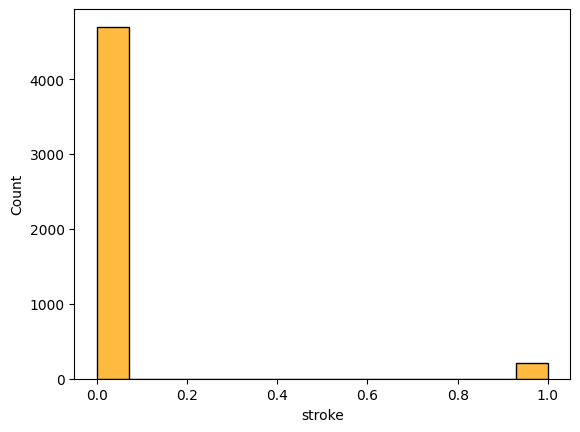

In [18]:
import seaborn as sns

sns.histplot(data=dat, x="stroke", color = 'orange')

In [22]:
from imblearn.over_sampling import SMOTE
#overcome imbalance data using SMOTE

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

<Axes: xlabel='stroke', ylabel='Count'>

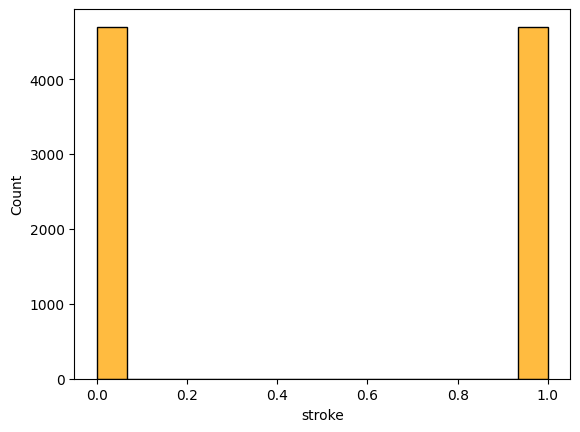

In [23]:
import seaborn as sns

sns.histplot(data=y, color = 'orange')

In [31]:
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.9113


In [32]:
pickle.dump(clf, open('stroke.pkl', 'wb'))